## Computes random CBDAS and beta-lactamase sequences, which are used to calculate the PCs used in Fig 4

In [6]:
import os
import sys
import warnings
import multiprocessing as mp
import random
import pickle
import glob
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy
import sklearn
from sklearn.decomposition import PCA, MiniBatchSparsePCA, SparsePCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

sys.path.append('../common')
import data_io_utils
import paths
import utils
import constants
import plot_style_utils

sys.path.append('../A006_simulated_annealing/')
import A006_common


import A011_common

%reload_ext autoreload
%autoreload 2

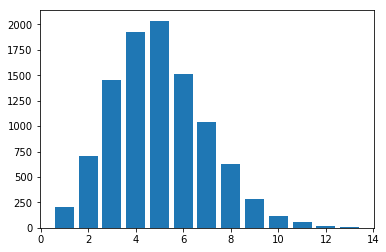

4.9971


In [7]:
MU = 4
nmut = np.random.poisson(lam=MU, size=10000) + 1

uv, uc = np.unique(nmut, return_counts=True)
plt.bar(uv, uc)
plt.show()

print(np.mean(nmut))

## CBDAS

In [8]:
N_RANDOM_SEQS = 50000

print('Average number of mutations per site:', (MU + 1)/len(constants.AVCBDAS_AA_SEQ))
print('Expected number of mutants that contain a given mutation:', N_RANDOM_SEQS*(MU + 1)/len(constants.AVCBDAS_AA_SEQ)/20)


np.random.seed(1)
random.seed(1)

rseqs = [A006_common.make_n_random_edits(constants.AVCBDAS_AA_SEQ, np.random.poisson(lam=MU)+1) 
         for i in range(N_RANDOM_SEQS)]

print(len(rseqs))

with open('A011f_CBDAS_random_seqs.txt', 'w') as f:
    for item in rseqs:
        f.write("%s\n" % item)

Average number of mutations per site: 0.009191176470588236
Expected number of mutants that contain a given mutation: 22.977941176470587
50000


## THCAS

In [9]:
N_RANDOM_SEQS = 50000

print('Average number of mutations per site:', (MU + 1)/len(constants.THCAS_AA_SEQ))
print('Expected number of mutants that contain a given mutation:', N_RANDOM_SEQS*(MU + 1)/len(constants.THCAS_AA_SEQ)/20)


np.random.seed(1)
random.seed(1)

rseqs = [A006_common.make_n_random_edits(constants.THCAS_AA_SEQ, np.random.poisson(lam=MU)+1) 
         for i in range(N_RANDOM_SEQS)]

print(len(rseqs))

with open('A011f_THCAS_random_seqs.txt', 'w') as f:
    for item in rseqs:
        f.write("%s\n" % item)

Average number of mutations per site: 0.009174311926605505
Expected number of mutants that contain a given mutation: 22.93577981651376
50000
